In [2]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [3]:
%load_ext autoreload
%autoreload 2

from rdkit import RDLogger
from utils import conf_from_yaml, generator_from_conf
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

def queue_generations(*args: str):
    for yaml_path in args:
        conf = conf_from_yaml(yaml_path, repo_root)
        generator = generator_from_conf(conf, repo_root)
        generate_and_analyze(generator, conf)

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
/opt/anaconda3/envs/v3-forge/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


seed: 1752552920
Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.0000, node: Oc1ccccc1
100 - time: 1.21, average over 100: 0.0000
<Best reward updated> 158 - time: 1.81, reward: 0.3364, node: Brc1cccc(Br)c1
200 - time: 2.28, average over 100: 0.0321
<Best reward updated> 203 - time: 2.31, reward: 0.3605, node: Oc1ccc(Br)cc1Br
<Best reward updated> 209 - time: 2.37, reward: 0.3663, node: Nc1cc(Br)cc(Br)c1
<Best reward updated> 214 - time: 2.43, reward: 0.3853, node: Nc1c(Br)cccc1Br
<Best reward updated> 268 - time: 3.14, reward: 0.3860, node: Nc1c(Br)cncc1Br
300 - time: 3.46, average over 100: 0.1675
<Best reward updated> 357 - time: 4.42, reward: 0.3872, node: Nc1ccc(Br)c(N)c1CBr
<Best reward updated> 380 - time: 4.66, reward: 0.3920, node: NCc1cccc(Br)c1N
<Best reward updated> 386 - time: 4.72, reward: 0.3975, node: Nc1c(Br)cccc1C(Br)Br
400 - time: 4.86, average over 100: 0.1615
<Best reward updated> 430 - time: 5.25, reward: 0.4263, node: Nc1cccc(N)c1CBr
<Best 

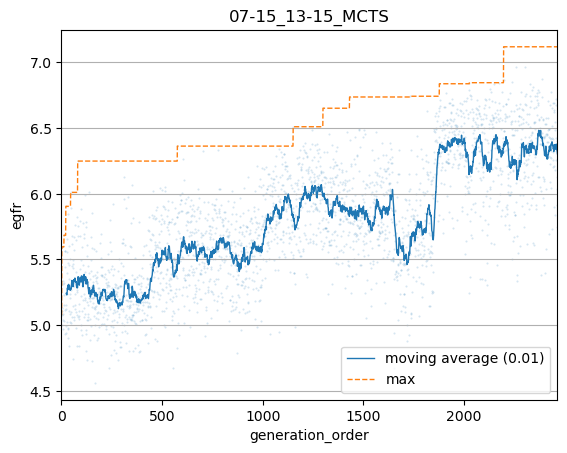

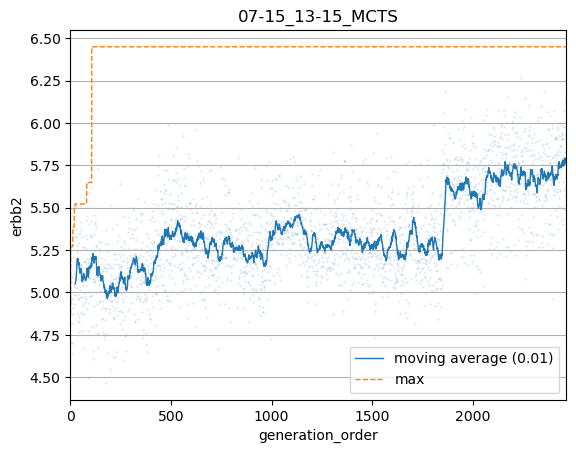

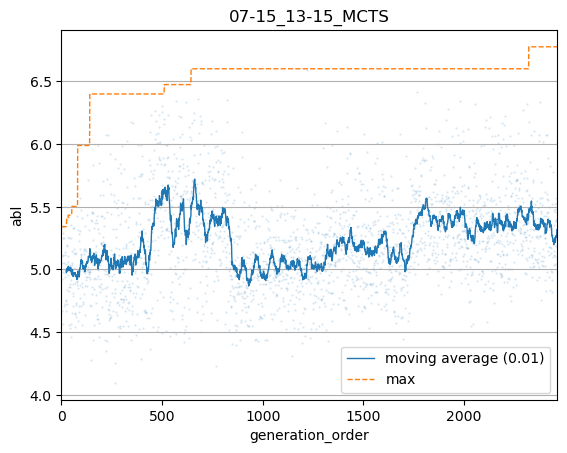

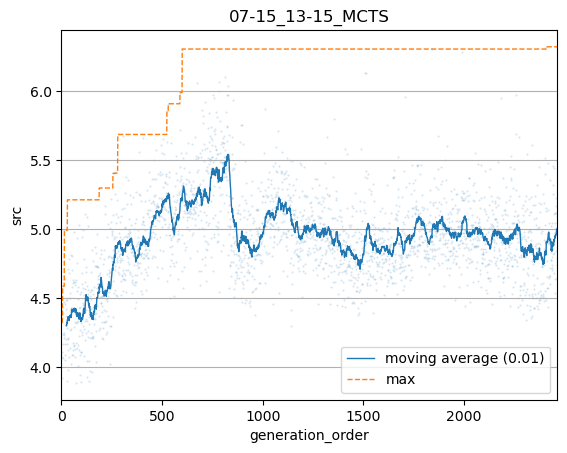

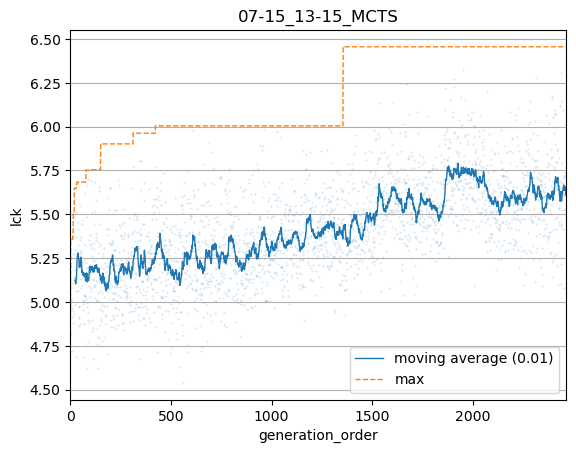

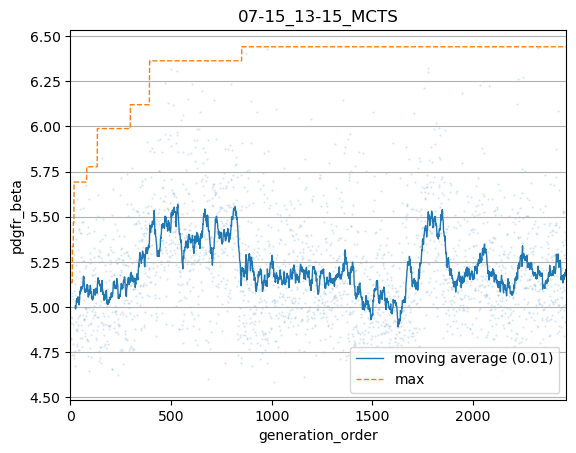

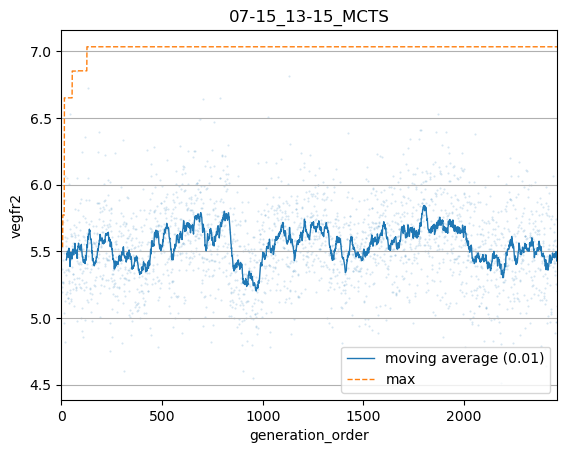

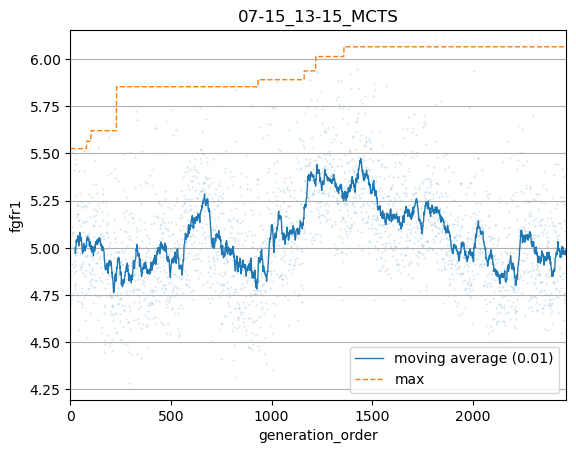

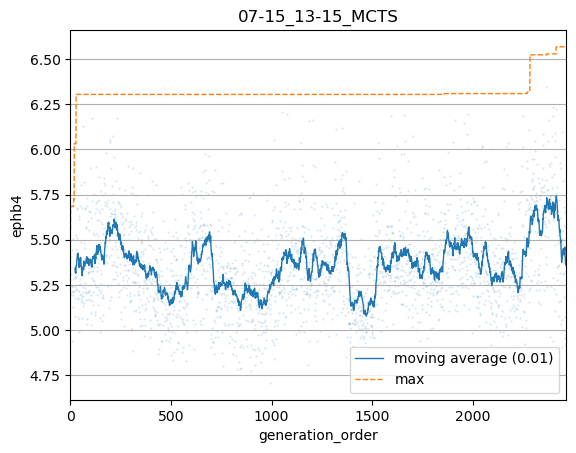

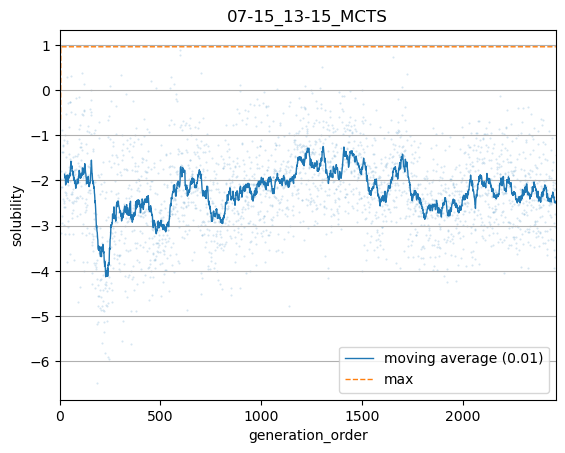

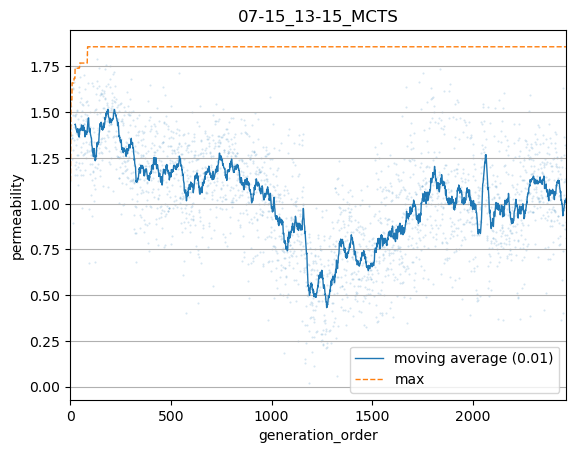

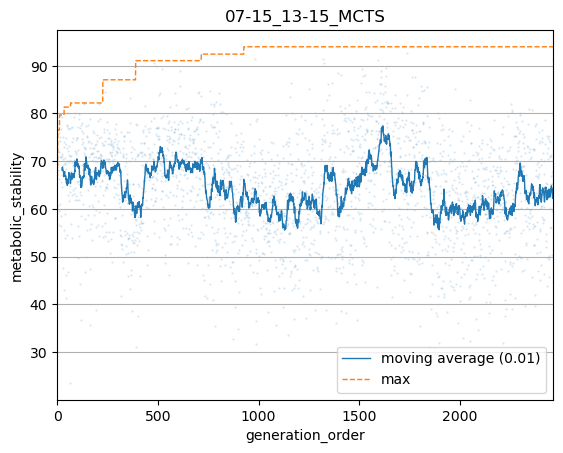

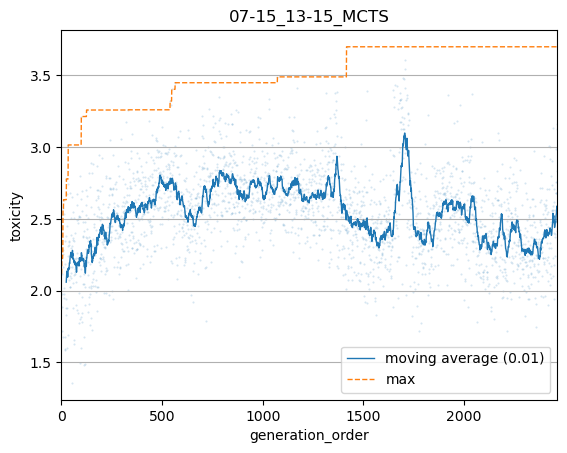

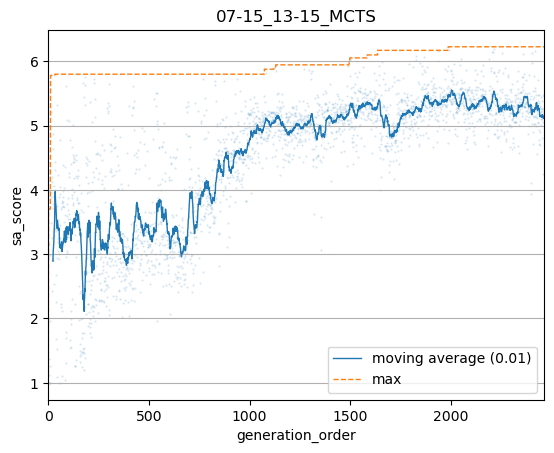

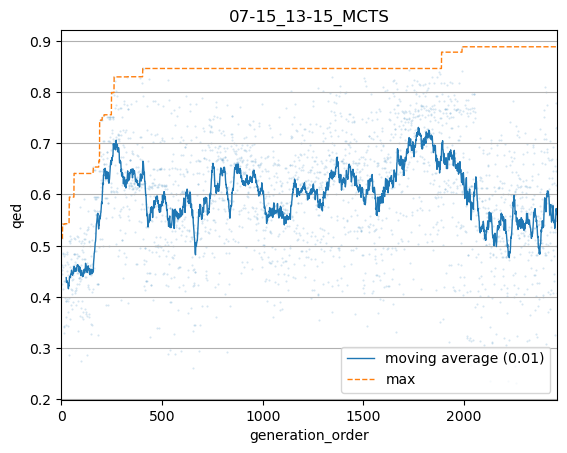

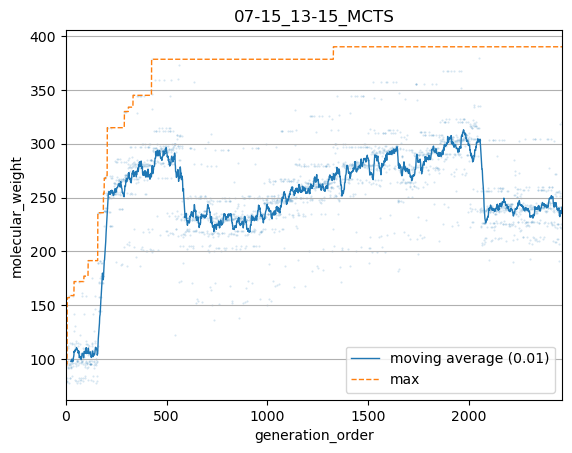

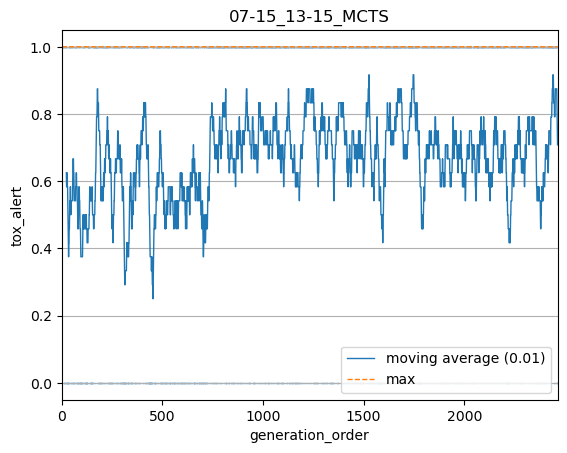

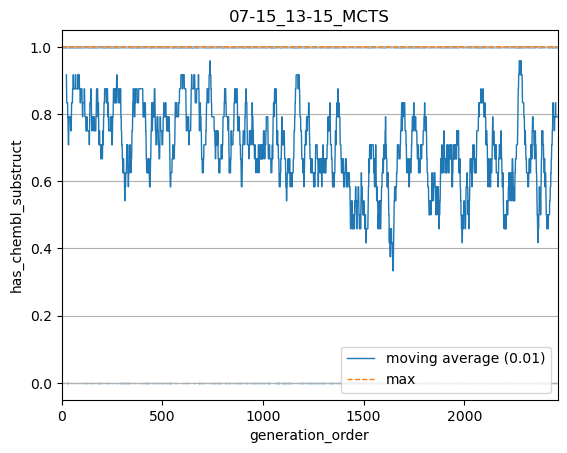

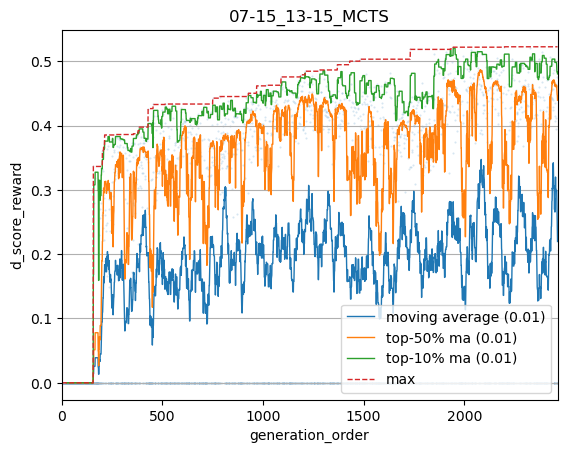

number of generated nodes: 2463
valid rate: 1.0
unique rate: 1.0
node_per_sec: 64.23639917431998
best_reward: 0.5224596788529254
average_reward: 0.18354462491046672


In [ ]:
# start generation

# yaml_path = "config/mcts_helm.yaml"
# yaml_path = "config/mcts_smiles.yaml"
# yaml_path = "config/model_test.yaml"
# yaml_path = "config/mcts_d_score.yaml"
# yaml_path = "config/mcts_biot5.yaml"
yaml_path = "config/mcts_smirks.yaml"
# yaml_path = "config/mcts_jensen.yaml"
# yaml_path = "config/heapq_smiles.yaml"

conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
# queue_generations(c1, c2)

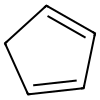

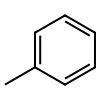

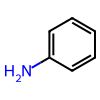

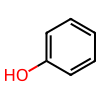

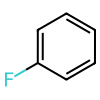

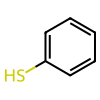

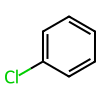

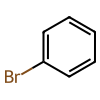

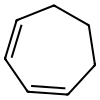

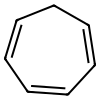

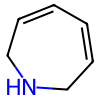

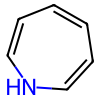

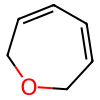

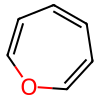

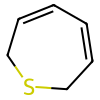

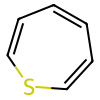

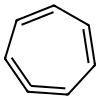

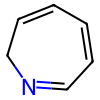

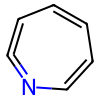

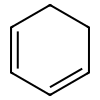

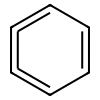

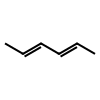

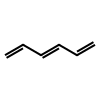

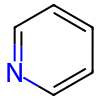

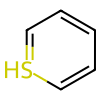

In [6]:
from utils import draw_mol
for c in generator.root.children:
    draw_mol(c.mol(), 100, 100)

In [ ]:
# continue generation
generator.generate(time_limit=conf.get("time_limit") - generator.passed_time, max_generations=conf.get("max_generations") - len(generator.unique_keys))
generator.plot(**conf.get("plot_args", {}))
generator.analyze()

In [16]:
#save mcts
save_path = generator.output_dir() + "save.mcts"
generator.save(save_path)

In [ ]:
#load generator and yaml
from generator import Generator
load_dir = "generation_result/06-26_08-51/"
conf = conf_from_yaml("sandbox/" + load_dir + "setting.yaml", repo_root)
generator = generator_from_conf(conf, repo_root)
generator = Generator.load(load_dir + "save.mcts", generator.transition)

In [ ]:
#time test
import cProfile
import pstats

profiler = cProfile.Profile()
profiler.enable()
conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
profiler.disable()

stats = pstats.Stats(profiler)
stats.sort_stats("cumtime").print_stats(100)